# wa - king ilçesi ev fiyatları

In [255]:
#visual studiodan commit ve push denemesi


import pandas as pd
pd.set_option("display.max_columns", 100)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [472]:
df = pd.read_csv('kc_house_data.csv')

In [471]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovated,bathrooms_per_bedroom,overall_condition_view,above_vs_living,total_area,high_quality_area,avg_room_size
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,69,0,0.333333,0,0,1180,8260,393.333333
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,73,1,0.750000,0,-400,2970,17990,856.666667
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,91,0,0.500000,0,0,770,4620,385.000000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,37,0,0.666667,0,0,1680,13440,560.000000
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,29,0,0.750000,0,0,1715,12005,571.666667


In [470]:
abs(df.corr(numeric_only = True) ['price'].sort_values(ascending = False)) # sadece 0.20 0.90 arasındakileri alıyruz

price                     1.000000
high_quality_area         0.677532
grade                     0.647059
total_area                0.631209
sqft_living               0.627408
sqft_above                0.607806
sqft_living15             0.576406
avg_room_size             0.513376
bathrooms                 0.449191
lat                       0.388249
floors                    0.337462
bedrooms                  0.315605
view                      0.240263
overall_condition_view    0.237189
bathrooms_per_bedroom     0.223933
waterfront                0.158225
yr_built                  0.111356
sqft_lot                  0.096348
long                      0.092168
sqft_lot15                0.090080
yr_renovated              0.085732
renovated                 0.085449
sqft_basement             0.019888
id                        0.007810
condition                 0.017944
above_vs_living           0.019888
age                       0.111356
Name: price, dtype: float64

In [309]:
print(df['bedrooms'].isnull().sum())
print(df['bathrooms'].isnull().sum())

0
0


In [209]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## EDA

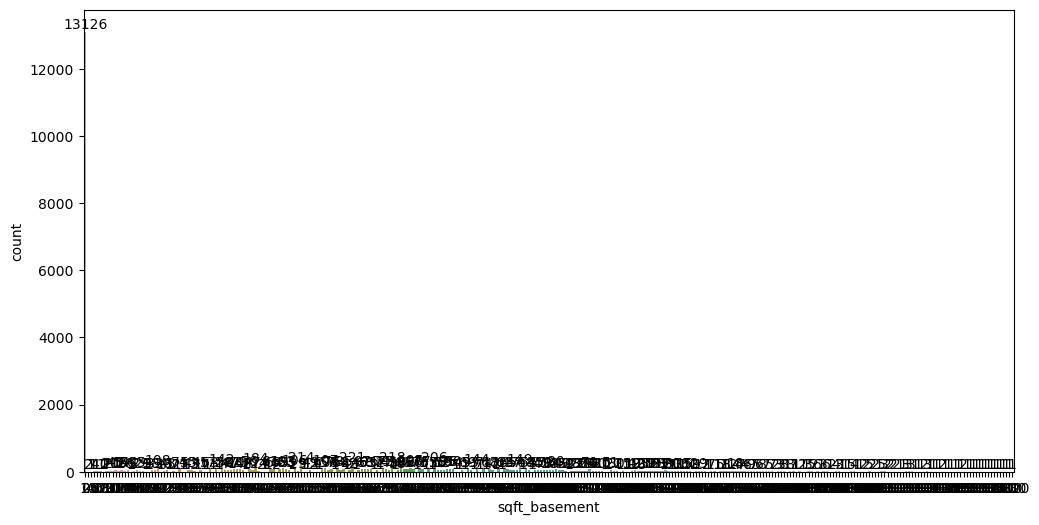

In [210]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x = df['sqft_basement']);
ax.bar_label(ax.containers[0]);

In [275]:
df['bathrooms_per_bedroom'].value_counts()

bathrooms_per_bedroom
0.500000    3245
0.625000    2514
0.833333    2352
0.583333    1886
0.333333    1806
            ... 
0.468750       1
0.125000       1
0.000000       1
0.312500       1
0.444444       1
Name: count, Length: 73, dtype: int64

In [212]:
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6217,7686202275,20141209T000000,219950.0,3,1.0,1210,8000,1.0,0,0,3,6,1210,0,1954,0,98198,47.4211,-122.314,1430,8000
11821,3426059050,20140520T000000,315000.0,2,1.0,790,6969,1.0,0,0,3,6,790,0,1955,1984,98052,47.6978,-122.164,1380,12196
17556,3876590420,20140624T000000,350000.0,4,3.0,2560,5606,2.0,0,0,3,9,2560,0,2004,0,98092,47.3274,-122.178,2667,7334


In [276]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,renovated,bathrooms_per_bedroom
count,2.140700e+04,2.140700e+04,21407.000000,21407.000000,21407.000000,2.140700e+04,21407.000000,21407.000000,21407.000000,21407.000000,21407.000000,21407.000000,21407.000000,21407.000000,21407.000000,21407.000000,21407.000000,21407.000000,21407.000000,21407.000000,21407.000000,21403.000
mean,4.586118e+09,5.286252e+05,3.362311,2.099197,2054.990424,1.480213e+04,1.490891,0.006914,0.225347,3.411548,7.634652,1767.983136,287.007287,1970.898818,84.096651,47.559906,-122.214393,1974.746812,12550.088663,53.101182,0.042136,inf
std,2.878658e+09,3.243666e+05,0.891107,0.737864,854.469352,4.028374e+04,0.538255,0.082862,0.749628,0.651014,1.119456,781.913210,431.199874,29.352001,400.986056,0.138870,0.140726,666.083170,26277.741703,29.352001,0.200903,NaN
min,1.000102e+06,7.800000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,5.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,9.000000,0.000000,0.000
25%,2.124049e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.032500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.469800,-122.329000,1480.000000,5100.000000,28.000000,0.000000,0.500
50%,3.904980e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.584000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571700,-122.232000,1830.000000,7600.000000,49.000000,0.000000,0.625
75%,7.331900e+09,6.388500e+05,4.000000,2.500000,2530.000000,1.053500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,560.000000,1996.000000,0.000000,47.678300,-122.126000,2350.000000,10018.000000,73.000000,0.000000,0.750
max,9.900000e+09,3.850000e+06,9.000000,4.750000,5990.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,11.000000,5990.000000,2850.000000,2015.000000,2015.000000,47.777600,-121.315000,5790.000000,871200.000000,124.000000,1.000000,inf


In [214]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [215]:
df.shape

(21613, 21)

In [469]:
abs(df.corr(numeric_only = True) ['price'].sort_values(ascending = False)) # sadece 0.20 0.90 arasındakileri alıyruz

price                     1.000000
high_quality_area         0.677532
grade                     0.647059
total_area                0.631209
sqft_living               0.627408
sqft_above                0.607806
sqft_living15             0.576406
avg_room_size             0.513376
bathrooms                 0.449191
lat                       0.388249
floors                    0.337462
bedrooms                  0.315605
view                      0.240263
overall_condition_view    0.237189
bathrooms_per_bedroom     0.223933
waterfront                0.158225
yr_built                  0.111356
sqft_lot                  0.096348
long                      0.092168
sqft_lot15                0.090080
yr_renovated              0.085732
renovated                 0.085449
sqft_basement             0.019888
id                        0.007810
condition                 0.017944
above_vs_living           0.019888
age                       0.111356
Name: price, dtype: float64

In [217]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [473]:
df['age'] = 2024 - df['yr_built']

In [474]:
df['zipcode'] = df['zipcode'].astype('category')

In [475]:
df = df[df['bedrooms'] < 10]

In [476]:
df = df[df['bathrooms'] < 5]

In [477]:
df = df[df['grade']>4]

In [478]:
df = df[df['grade']<12]

In [479]:
df = df[df['floors'] < 2.5]

In [480]:
df = df[df['sqft_above'] < 5000]

In [481]:
df = df[df['sqft_basement'] < 500]

In [482]:
df = df[df['sqft_living15'] < 4000]

In [436]:
df = df[df['sqft_living'] < 6000]

In [490]:
df = df[df['high_quality_area'] < 50000]

In [483]:
df['renovated'] = df['yr_renovated'] != 0
df['renovated'] = df['renovated'].astype(int)

In [484]:
df['bathrooms_per_bedroom'] = df['bathrooms'] / (df['bedrooms'].replace(0, 1))

In [486]:
df['young_and_good'] = df['age'] / (df['grade'])

In [487]:
df['overall_condition_view'] = df['condition'] * df['view']  # Genel durum ve manzara puanı
df['above_vs_living'] = df['sqft_above'] - df['sqft_living']  # Yerüstü alan ve yaşam alanı farkı
df['total_area'] = df['sqft_living'] + df['sqft_basement'] 
df['high_quality_area'] = df['sqft_living'] * df['grade']  # Yüksek kaliteli alan
df['avg_room_size'] = df['sqft_living'] / (df['bedrooms'].replace(0, 1))

df['waterfront'] = df['waterfront'].astype(int)

In [247]:
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,renovated
id,1.000000,-0.014148,0.004600,0.011299,-0.006900,-0.131906,0.020390,-0.000631,0.014057,-0.024365,0.013862,-0.005507,-0.003687,0.023712,-0.017241,-0.001505,0.022013,0.000522,-0.140802,-0.023712,-0.017282
price,-0.014148,1.000000,0.310882,0.497211,0.670280,0.074944,0.260334,0.242462,0.385761,0.049496,0.657849,0.569300,0.295897,0.039128,0.132162,0.335649,0.017428,0.586528,0.066938,-0.039128,0.131786
bedrooms,0.004600,0.310882,1.000000,0.516642,0.597760,0.028356,0.174063,-0.012414,0.071417,0.026094,0.354301,0.487074,0.301293,0.156727,0.016007,-0.014794,0.136460,0.400070,0.025308,-0.156727,0.015708
bathrooms,0.011299,0.497211,0.516642,1.000000,0.739968,0.070419,0.506137,0.048762,0.163742,-0.124864,0.650868,0.664916,0.260607,0.514890,0.048094,0.019349,0.227546,0.558479,0.069653,-0.514890,0.047594
sqft_living,-0.006900,0.670280,0.597760,0.739968,1.000000,0.155725,0.354672,0.079199,0.256455,-0.056076,0.748511,0.864793,0.413442,0.323085,0.052477,0.047217,0.248227,0.757550,0.167836,-0.323085,0.052196
sqft_lot,-0.131906,0.074944,0.028356,0.070419,0.155725,1.000000,-0.011864,0.021597,0.068351,-0.005633,0.099278,0.165611,0.008276,0.047483,0.008625,-0.090186,0.225831,0.140515,0.707071,-0.047483,0.008730
floors,0.020390,0.260334,0.174063,0.506137,0.354672,-0.011864,1.000000,0.020266,0.021181,-0.265267,0.461167,0.532253,-0.262336,0.490008,0.006007,0.046929,0.126465,0.275915,-0.019202,-0.490008,0.005926
waterfront,-0.000631,0.242462,-0.012414,0.048762,0.079199,0.021597,0.020266,1.000000,0.393072,0.019131,0.062988,0.052701,0.061375,-0.032442,0.091492,-0.017230,-0.043543,0.075948,0.029875,0.032442,0.091942
view,0.014057,0.385761,0.071417,0.163742,0.256455,0.068351,0.021181,0.393072,1.000000,0.049844,0.226374,0.137849,0.258224,-0.063711,0.103683,0.002411,-0.084382,0.262693,0.063234,0.063711,0.103833
condition,-0.024365,0.049496,0.026094,-0.124864,-0.056076,-0.005633,-0.265267,0.019131,0.049844,1.000000,-0.148541,-0.160722,0.180322,-0.360887,-0.062702,-0.015363,-0.104923,-0.091159,-0.000448,0.360887,-0.062226


In [488]:
abs(df.corr(numeric_only = True) ['price'].sort_values(ascending = False)) # sadece 0.20 0.90 arasındakileri alıyruz

price                     1.000000
high_quality_area         0.680690
grade                     0.646874
total_area                0.633399
sqft_living               0.629687
sqft_above                0.610286
sqft_living15             0.575349
avg_room_size             0.514846
bathrooms                 0.450472
lat                       0.383790
floors                    0.334599
bedrooms                  0.316465
view                      0.250634
overall_condition_view    0.246874
bathrooms_per_bedroom     0.223802
waterfront                0.166057
yr_built                  0.112664
sqft_lot                  0.095792
long                      0.090174
sqft_lot15                0.089653
yr_renovated              0.086627
renovated                 0.086325
sqft_basement             0.019137
id                        0.008774
condition                 0.017413
above_vs_living           0.019137
age                       0.112664
young_and_good            0.217643
Name: price, dtype: 

In [249]:
df.corr(numeric_only = True) ['price'].sort_values(ascending = False) # sadece 0.20 0.90 arasındakileri alıyruz

price            1.000000
sqft_living      0.670280
grade            0.657849
sqft_living15    0.586528
sqft_above       0.569300
bathrooms        0.497211
view             0.385761
lat              0.335649
bedrooms         0.310882
sqft_basement    0.295897
floors           0.260334
waterfront       0.242462
yr_renovated     0.132162
renovated        0.131786
sqft_lot         0.074944
sqft_lot15       0.066938
condition        0.049496
yr_built         0.039128
long             0.017428
id              -0.014148
age             -0.039128
Name: price, dtype: float64

In [491]:
x = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
        'view', 'sqft_basement', 'bedrooms', 'lat', 'floors','waterfront',
        'age','renovated', 'zipcode','bathrooms_per_bedroom','avg_room_size','high_quality_area','total_area','above_vs_living','overall_condition_view','young_and_good']] # age and condition is domain info
y= df[['price']]

In [492]:
lr = LinearRegression()
R = Ridge()
L = Lasso()
E = ElasticNet()

In [493]:
x = pd.get_dummies(x, drop_first=True)

In [494]:
def model_fit(x,y, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    ml = model.fit(x_train, y_train)
    y_pred = ml.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

In [495]:
model_fit(x,y,lr)

(102358.02586351123, 0.8337625693806242)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


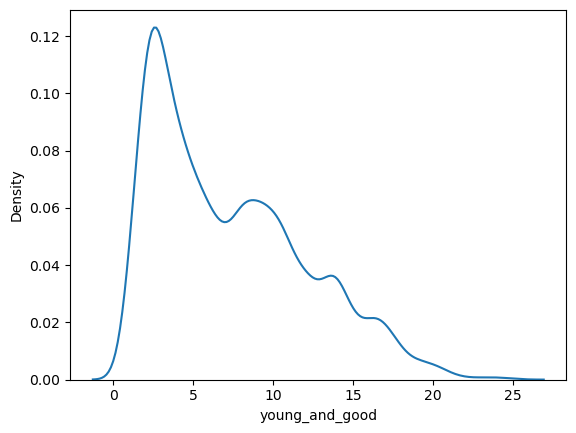

In [498]:
sns.kdeplot(x = df['young_and_good']);

<Axes: >

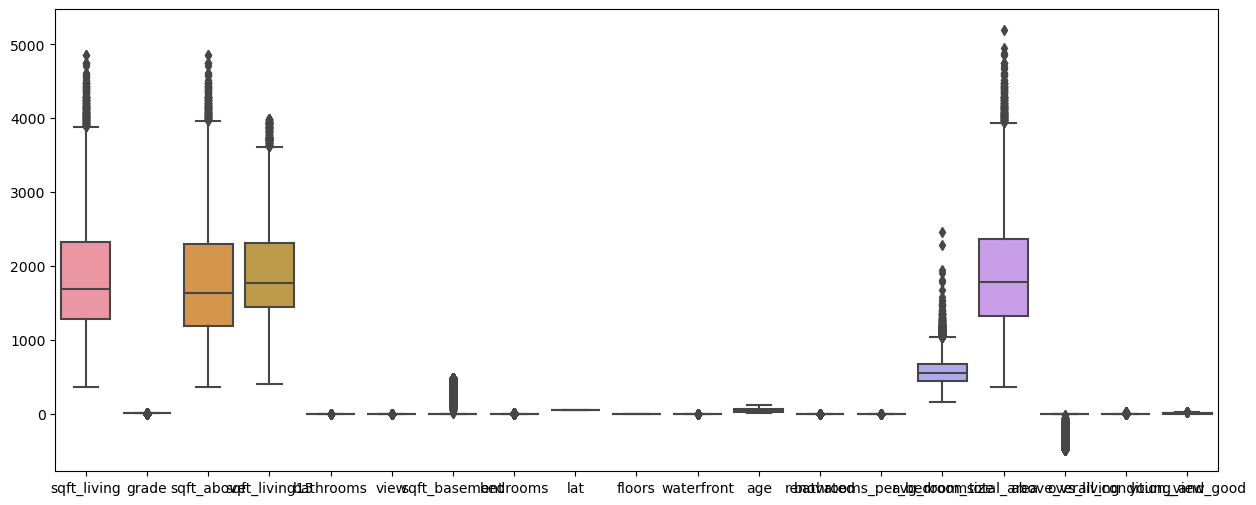

In [496]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
        'view', 'sqft_basement', 'bedrooms', 'lat', 'floors','waterfront',
        'age','renovated', 'zipcode','bathrooms_per_bedroom','avg_room_size','total_area','above_vs_living','overall_condition_view','young_and_good']])